## Backpropagation Algorithm 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X= np.loadtxt('Files/ex3data1.txt')
y= np.loadtxt('Files/ex3datay.txt')
print('X',X.shape)
print('y',y.shape)

X (5000, 400)
y (5000,)


In [3]:
yy= pd.Series(y)
yy= pd.get_dummies(yy)
print("yy",yy.shape)

yy (5000, 10)


In [4]:
theta1= np.loadtxt('Files/ex3weights.txt')
theta2= np.loadtxt('Files/ex3weights2.txt')
theta= np.array([theta1, theta2])
print('Theta1',theta1.shape)
print('Theta2',theta2.shape)

Theta1 (25, 401)
Theta2 (10, 26)


In [5]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z));

### Sigmoid gradient

In [6]:
def sigmoid_grad(z):
    return sigmoid(z)* (1- sigmoid(z))

### Initializing Theta randomly

In [7]:
def init_random():
    lim= 0.12
    theta1= np.random.uniform(-lim, lim, size= (25, 401))
    theta2= np.random.uniform(-lim, lim, size= (10, 26))
    return theta1, theta2

### Forword Propagation

In [8]:
def hypa(theta1, theta2):
    XX= X.transpose()
    a1= np.insert(XX, 0, 1, axis=0)
    
    z2= np.dot(theta1, a1)
    a2= sigmoid(z2)
    
    a2= np.insert(a2, 0, 1, axis=0)
    z3= np.dot(theta2, a2)
    a3= sigmoid(z3)
    
    return a3

print('hyp',(hypa(theta1, theta2)).shape)

hyp (10, 5000)


### Making theta compatible for opt func

In [9]:
def encode(theta1, theta2):
    th1= theta1.flatten()
    th2= theta2.flatten()
    th= np.concatenate((th1, th2), axis= 0)
    return th
    
#encode(theta1, theta2)

In [10]:
def decode(theta):
    th1= theta[:25*401]
    th2= theta[25*401:]
    theta1= th1.reshape((25, 401))
    theta2= th2.reshape((10, 26))
    return theta1, theta2
    
#decode(encode(theta1, theta2))

### Cost Function

In [11]:
def cost(theta):
    theta1, theta2= decode(theta)
    m= X.shape[0]
    h= hypa(theta1, theta2)
    t1= yy.transpose() * np.log(h)
    t2= (1- yy.transpose()) * np.log(1- h)
    t= t1+ t2
    t= t.sum().sum() * -1
    c= t/float(m)
    print('Now the cost is {}'.format(c))
    return c
    
    th1= theta1[:,1:]**2
    th2= theta2[:,1:]**2
    th= th1.sum().sum() + th2.sum().sum()
    lembda= 1.0
    regu= lembda * th / (2 * m)
    
    c= c + regu
    return c
    

tr1, tr2= init_random()
cost(encode(theta1, theta2))

Now the cost is 0.2876291651613189


0.2876291651613189

### Gradient computation

In [12]:
def gradient(theta):
    theta1, theta2= decode(theta)
    XX= X.transpose()
    a1= np.insert(XX, 0, 1, axis=0)
    #print('a1',a1.shape)
    
    z2= np.dot(theta1, a1)
    a2= sigmoid(z2)
    
    a2= np.insert(a2, 0, 1, axis=0)
    #print('a2', a2.shape)
    z3= np.dot(theta2, a2)
    a3= sigmoid(z3)
    
    m= 5000
    n= 401
    h= 25
    r= 10
    
    d3= a3.transpose() - yy
    #print('d3', d3.shape)
    
    smg_z2= sigmoid_grad(z2).transpose()
    #print('smg_z2',smg_z2.shape)
    
    #print('theta2 w/o 1 col',theta2[:,1:].shape)
    d2= np.dot(d3, theta2[:,1:]) * smg_z2
    #print('d2', d2.shape)
    
    delta1= np.dot(d2.transpose(), a1.transpose())
    #print('delta1', delta1.shape)
    
    delta2= np.dot(d3.transpose(), a2.transpose())
    #print('delta2', delta2.shape)
    
    theta1_grad= delta1/ float(m)
    theta2_grad= delta2/ float(m)
    
    theta_grad= encode(theta1_grad, theta2_grad)
    return theta_grad
    
#gradient(theta1, theta2)

### Start Training

In [13]:
theta1, theta2 = init_random()
initTheta= encode(theta1, theta2)

In [14]:
import scipy.optimize as op
result= op.minimize(fun= cost, x0= initTheta, method= 'TNC', jac=gradient)
result.x

Now the cost is 7.311291728195247
Now the cost is 7.311291500725894
Now the cost is 7.311291634728192
Now the cost is 3.548944653483345
Now the cost is 3.54894462341494
Now the cost is 3.548944652875232
Now the cost is 3.5489446099366324
Now the cost is 3.4852584843428516
Now the cost is 3.2475991178352737
Now the cost is 3.247599098585044
Now the cost is 3.247599114622144
Now the cost is 3.247597073705182
Now the cost is 3.162754777926141
Now the cost is 2.945341645898419
Now the cost is 2.945341559204965
Now the cost is 2.9453415862920163
Now the cost is 2.94534112082867
Now the cost is 2.399914107165219
Now the cost is 2.5322420617850683
Now the cost is 2.425962992230579
Now the cost is 2.4029626904689145
Now the cost is 2.39898012162689
Now the cost is 2.3989799609489966
Now the cost is 2.398980065072561
Now the cost is 2.3989800712646816
Now the cost is 2.398979987335459
Now the cost is 2.62112850934248
Now the cost is 2.0024119845360002
Now the cost is 2.002411836341201
Now the c

Now the cost is 0.0784895778726056
Now the cost is 0.07848957909382129
Now the cost is 0.0784895791008808
Now the cost is 0.07848957266324133
Now the cost is 0.07848955981311287
Now the cost is 0.07848956746811182
Now the cost is 0.07848956503054645
Now the cost is 0.07848956958384375
Now the cost is 0.07848954561208532
Now the cost is 0.07848950762249564
Now the cost is 0.078488808985887
Now the cost is 0.07845640081860344
Now the cost is 0.8992414022117584
Now the cost is 0.17010138854237644
Now the cost is 0.06778853741084291
Now the cost is 0.06433528277328021
Now the cost is 0.06332459477891335
Now the cost is 0.06332456989795723
Now the cost is 0.0633245761676043
Now the cost is 0.06332457354323184
Now the cost is 0.06332457719207087
Now the cost is 0.0633245763547612
Now the cost is 0.06332457594596072
Now the cost is 0.06332457472862853
Now the cost is 0.06332458368413917
Now the cost is 0.06332458027451585
Now the cost is 0.06332458479885375
Now the cost is 0.06332457607723889

/home/shiva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


Now the cost is 0.044696769900216246
Now the cost is 0.025255334229007217
Now the cost is 0.022318166781000563
Now the cost is 0.022318161468917765
Now the cost is 0.022318160623433288
Now the cost is 0.02231816307929348
Now the cost is 0.022318161723799627
Now the cost is 0.022318163451618706
Now the cost is 0.02231816461932
Now the cost is 0.02231816459569469
Now the cost is 0.02231816272322257
Now the cost is 0.02231816490877362
Now the cost is 0.022318165058579684
Now the cost is 0.013749990593847827
Now the cost is 0.013749987882257932
Now the cost is 0.013749988181996492
Now the cost is 0.013749989550037114
Now the cost is 0.013749988136726171
Now the cost is 0.013749989157783372
Now the cost is 0.013749988960578167
Now the cost is 0.013749989267895751
Now the cost is 0.013749989699808379
Now the cost is 0.013749989834822412
Now the cost is 0.01374999009755966
Now the cost is 0.013749989825183877
Now the cost is 0.013749989985238532
Now the cost is 0.007510183695025788
Now the co

Now the cost is 9.850094231571296e-05
Now the cost is 9.850097196825371e-05
Now the cost is 9.850095189658351e-05
Now the cost is 9.850097465596552e-05
Now the cost is 9.850095728334185e-05
Now the cost is 9.850085583694489e-05
Now the cost is 9.850074149829742e-05
Now the cost is 9.850083883725982e-05
Now the cost is 9.850080298889624e-05
Now the cost is 9.850047774300074e-05
Now the cost is 9.850076664842746e-05
Now the cost is 9.850065318988599e-05
Now the cost is 9.849908180335424e-05
Now the cost is 9.849263620545138e-05
Now the cost is 0.19899254818514955
Now the cost is 0.01718030830620869
Now the cost is 0.0003834978913255422
Now the cost is 8.002794113136431e-05
Now the cost is 8.002746020671685e-05
Now the cost is 8.002773308470473e-05
Now the cost is 8.0027761005143e-05
Now the cost is 8.002784685379314e-05
Now the cost is 8.002787116253423e-05
Now the cost is 8.002787444933358e-05
Now the cost is 8.002782452339806e-05
Now the cost is 8.002785694115551e-05
Now the cost is 6.

array([-0.43353048,  0.07992002,  0.07495768, ...,  6.63915735,
       11.96307145, -4.60140468])

In [15]:
theta1, theta2= decode(result.x)

In [16]:
cost(encode(theta1, theta2))

Now the cost is 1.0407391518005078e-06


/home/shiva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


1.0407391518005078e-06

In [17]:
def display(index):
    ex= X[index]
    ex= ex.reshape((20,20)).transpose()
    plt.imshow(ex, cmap= 'gray')

In [18]:
def predict(index, info=False):
    x= X[index]
    x= x[None].transpose()
    a1= np.insert(x, 0, 1, axis=0)
    z2= np.dot(theta1, a1)
    a2= sigmoid(z2)
    
    a2= np.insert(a2, 0, 1, axis=0)
    z3= np.dot(theta2, a2)
    a3= sigmoid(z3)
    
    output= np.argmax(a3) + 1
    
    if(info):
        #print(a3,'\n')
        print("True value is ",y[index])
        print("Predicted value is ",output)
        print("Probablity is ", max(a3))
        display(index)
    return output==y[index]

### Prediction

True value is  4.0
Predicted value is  4
Probablity is  [1.]


True

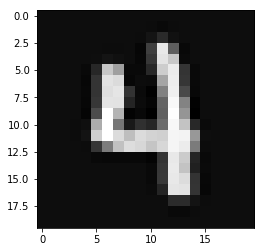

In [21]:
predict(2400, info=True)

In [22]:
counter= 0
for i in range(len(X)):
    if(predict(i)):
        counter+=1
print('Accuracy is {}'.format(counter*100.0/len(X)))

Accuracy is 100.0


# DONE